# Importing relevant libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
sns.set()

# Loading the dataset

In [3]:
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Gaining information from data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# To describe statistical data

In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Checking For Duplicates

In [6]:
df[df.duplicated()]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


# To display no.of.samples on each class

In [7]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

#  Data Visualization
**Species count**

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Species Count'}, xlabel='Species', ylabel='count'>

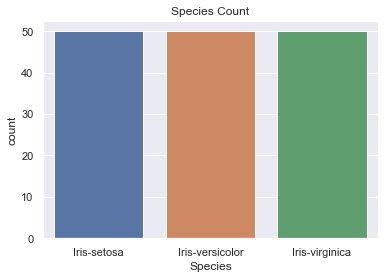

In [8]:
plt.title('Species Count')
sns.countplot(df['Species'])

# EXPLORATORY DATA ANALYSIS

Text(0.5, 1.0, 'sepal_length in cm')

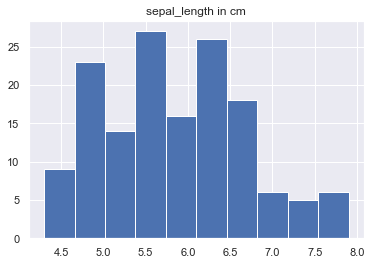

In [13]:
df['SepalLengthCm'].hist()
plt.title('sepal_length in cm')

Text(0.5, 1.0, 'sepal_width in cm')

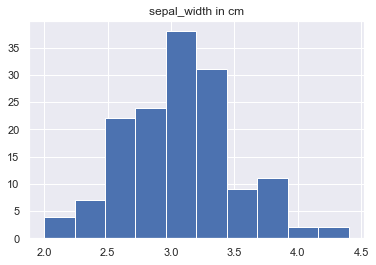

In [14]:
df['SepalWidthCm'].hist()
plt.title('sepal_width in cm')

Text(0.5, 1.0, 'Petal_length in cm')

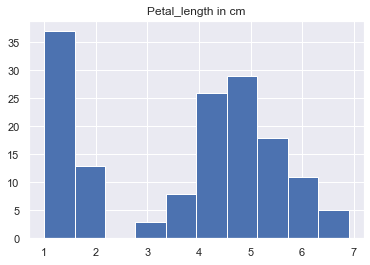

In [15]:
df['PetalLengthCm'].hist()
plt.title('Petal_length in cm')

Text(0.5, 1.0, 'petal_width in cm')

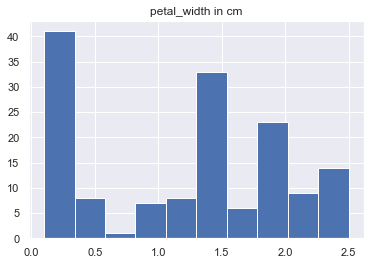

In [16]:
df['PetalWidthCm'].hist()
plt.title('petal_width in cm')

# Uni-variate Analysis
__Comparison between various species based on sepal length and width using scatterplot__

In [17]:
colors=['red','yellow','green']
species=['Iris-virginica','Iris-versicolor','Iris-setosa']

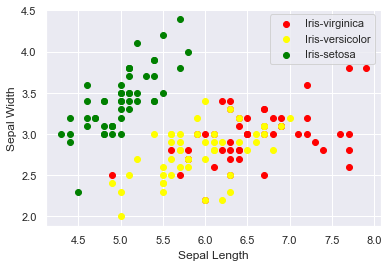

In [18]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],c=colors[i],label=species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

# 
**Comparison between various species based on Petal length and width**

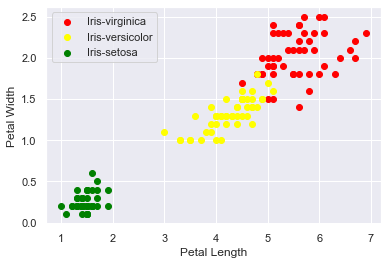

In [19]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],c=colors[i],label=species[i])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

# 
**Comparison between various species based on sepal length and petal length**

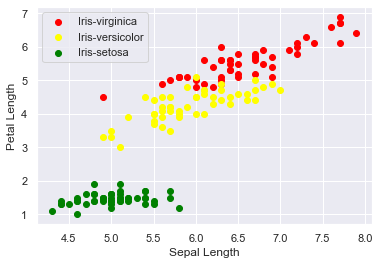

In [20]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'],c=colors[i],label=species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()

# 
**Comparison between various species based on sepal width and petal width**

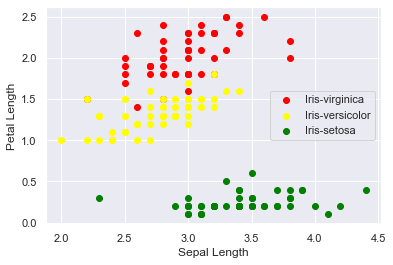

In [21]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['SepalWidthCm'],x['PetalWidthCm'],c=colors[i],label=species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()

# Bi-variate Analysis

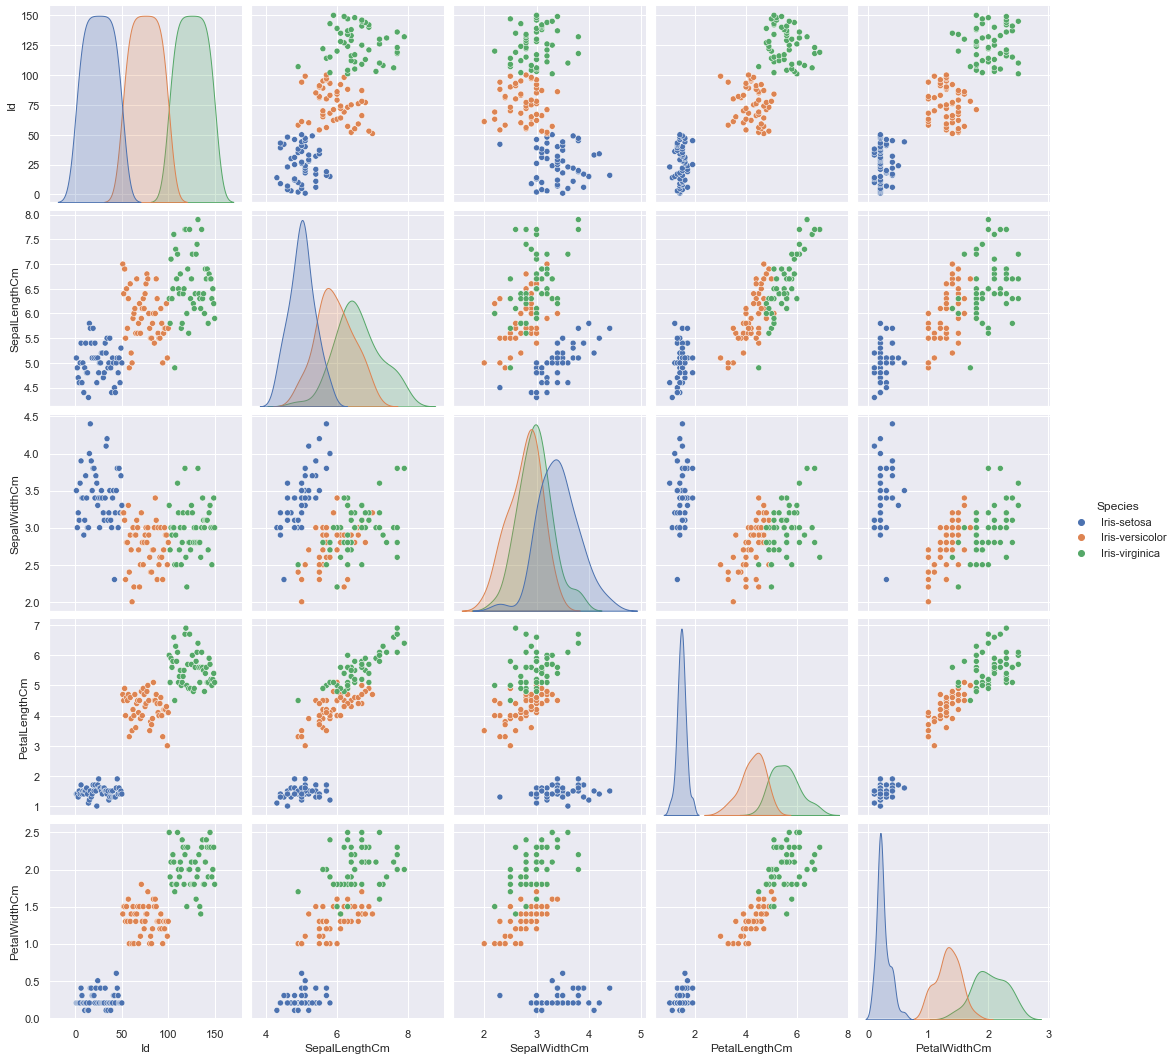

In [22]:
sns.pairplot(df,hue="Species",height=3)

# CORRELATION MATRIX

In [23]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

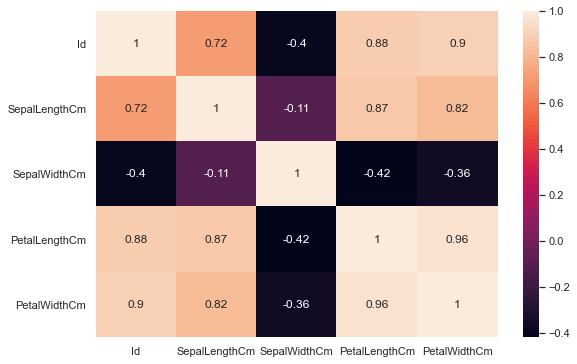

In [24]:
corr=df.corr()
fig, ax=plt.subplots(figsize=(9,6))
sns.heatmap(corr,annot=True,ax=ax)

# Checking Mean & Median Values for each species

In [25]:
df.groupby('Species').agg(['mean', 'median'])

Id        SepalLengthCm        SepalWidthCm         \
                  mean median          mean median         mean median   
Species                                                                  
Iris-setosa       25.5   25.5         5.006    5.0        3.418    3.4   
Iris-versicolor   75.5   75.5         5.936    5.9        2.770    2.8   
Iris-virginica   125.5  125.5         6.588    6.5        2.974    3.0   

                PetalLengthCm        PetalWidthCm         
                         mean median         mean median  
Species                                                   
Iris-setosa             1.464   1.50        0.244    0.2  
Iris-versicolor         4.260   4.35        1.326    1.3  
Iris-virginica          5.552   5.55        2.026    2.0

# Box plots to know about distribution

<AxesSubplot:xlabel='Species', ylabel='SepalLengthCm'>

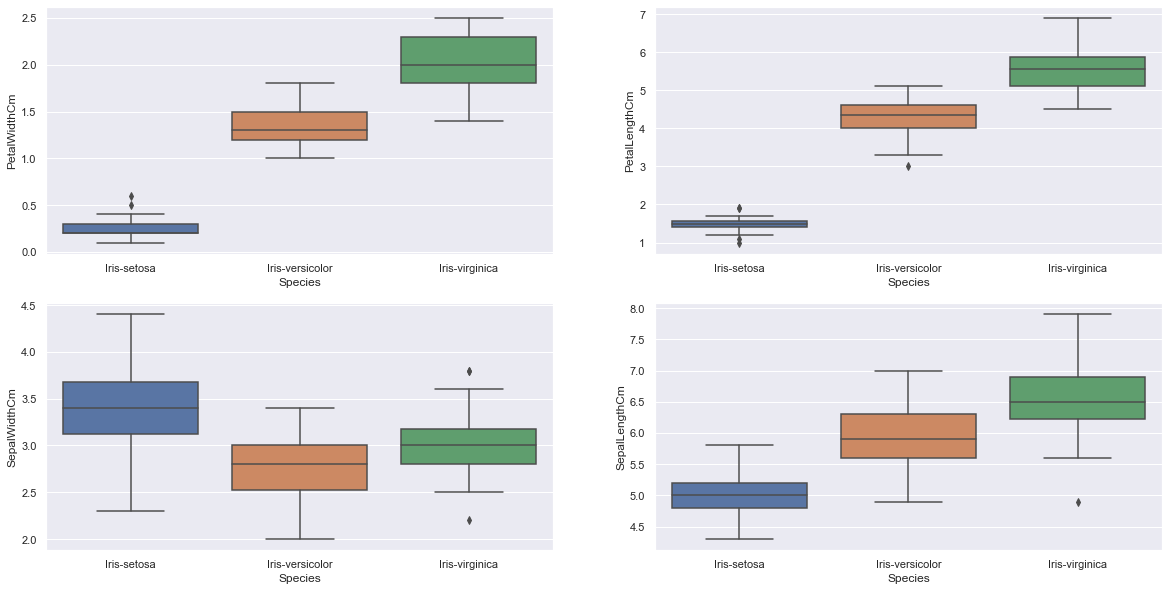

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(20,10))
sns.boxplot( y="PetalWidthCm", x= "Species", data=df, orient='v' , ax=axes[0, 0])
sns.boxplot( y="PetalLengthCm", x= "Species", data=df, orient='v' , ax=axes[0, 1])
sns.boxplot( y="SepalWidthCm", x= "Species", data=df, orient='v' , ax=axes[1, 0])
sns.boxplot( y="SepalLengthCm", x= "Species", data=df, orient='v' , ax=axes[1, 1])

# Violin Plot for checking distribution


<AxesSubplot:xlabel='Species', ylabel='SepalLengthCm'>

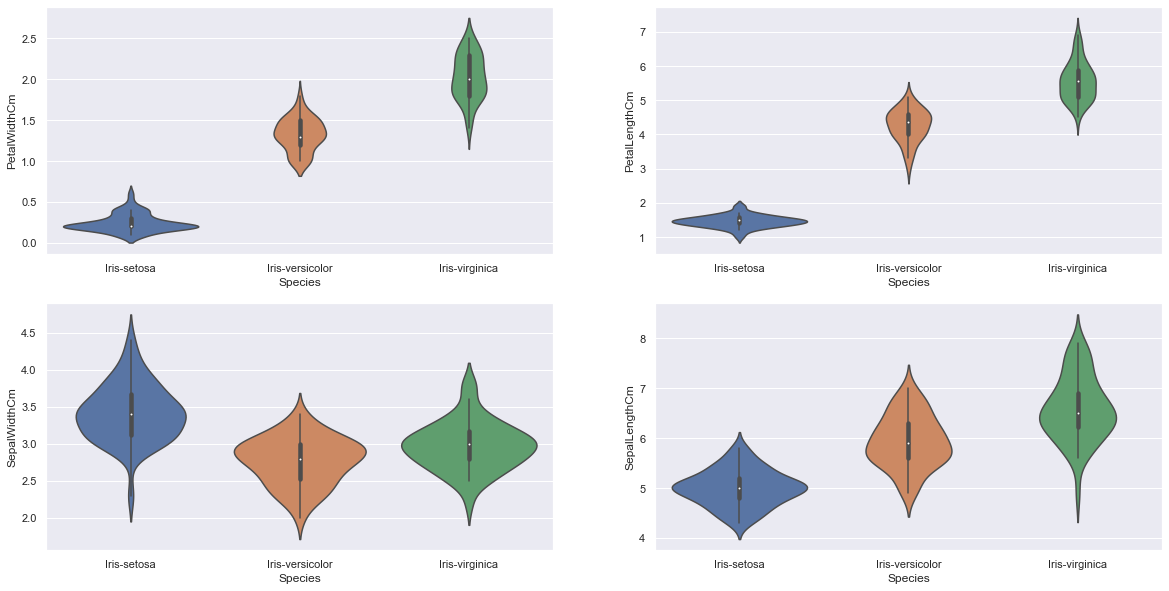

In [27]:
fig, axes = plt.subplots(2, 2, figsize=(20,10))
sns.violinplot( y="PetalWidthCm", x= "Species", data=df, orient='v' , ax=axes[0, 0])
sns.violinplot( y="PetalLengthCm", x= "Species", data=df, orient='v' , ax=axes[0, 1])
sns.violinplot( y="SepalWidthCm", x= "Species", data=df, orient='v' , ax=axes[1, 0])
sns.violinplot( y="SepalLengthCm", x= "Species", data=df, orient='v' , ax=axes[1, 1])

# Plotting the Histogram & Probability Density Function (PDF)

C:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

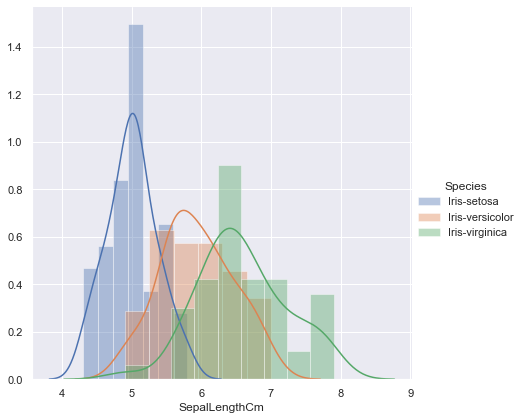

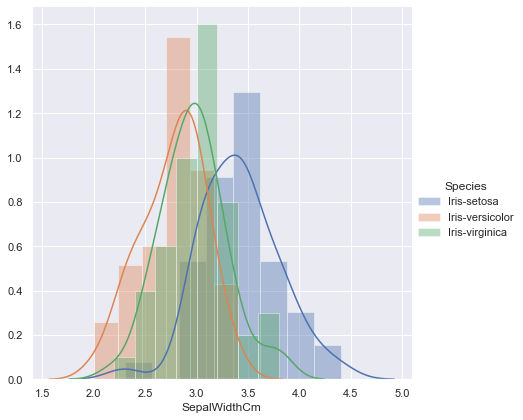

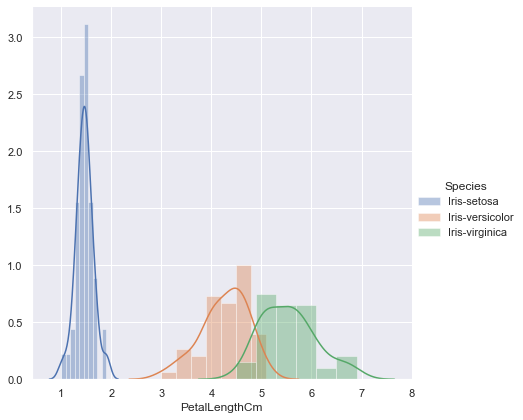

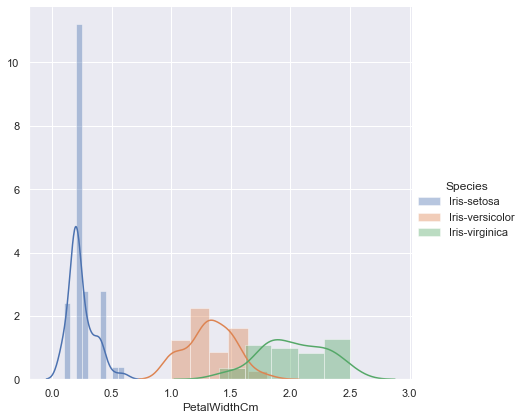

In [28]:
sns.FacetGrid(df, hue="Species", height=6) .map(sns.distplot, "SepalLengthCm") .add_legend()
sns.FacetGrid(df, hue="Species", height=6) .map(sns.distplot, "SepalWidthCm") .add_legend()
sns.FacetGrid(df, hue="Species", height=6) .map(sns.distplot, "PetalLengthCm").add_legend()
sns.FacetGrid(df, hue="Species", height=6) .map(sns.distplot, "PetalWidthCm") .add_legend()